# Applied Data Science Capstone Project

## Comparison Between Two Metropolitan Cities of US: Atlanta, GA vs Chicago,IL 

### Author : Pavithra Raman
### Date : August 2020

###  importing Libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


from geopy.geocoders import Nominatim

print('Libraries imported.')

Libraries imported.


In [7]:
!conda install -c conda-forge/label/cf202003 folium
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge/label/cf202003
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge/label/cf202003
    folium-0.10.1              |             py_0          59 KB  conda-forge/label/cf202003
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge/label/cf202003
    branca-0.4.0               |             py_0          26 KB  conda-forge/label/cf202003
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge/label/cf202003
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge/label/cf202003
    ------------------------------------------------------------
  

### Uploading and cleaning the datasets using pandas

### Using Watson data 'insert to code' to upload Atlanta dataset

In [8]:
# The code was removed by Watson Studio for sharing.

,Zipcode,Neighborhoods,Latitude,Longitude,City,State
0,30303,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,Atlanta,GA
1,30305,Buckhead - Garden Hills - Haynes Manor - Peach...,33.830054,-84.38472,Atlanta,GA
2,30306,Virginia Highlands - Morningside/Lenox Park - ...,33.786755,-84.35149,Atlanta,GA
3,30307,Candler Park - Druid Hills - Edgewood - Emory ...,33.768205,-84.33786,Atlanta,GA
4,30308,Midtown - Old Fourth Ward,33.771755,-84.38065,Atlanta,GA


### Using Watson data'insert to code' to upload Chicago dataset

In [9]:

body = client_a035847bc8114a73b586b8ddbfb0018e.get_object(Bucket='capstoneprojectbattleofneighborho-donotdelete-pr-gjpjikjtl8u5no',Key='chicago zipcodes.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

chicago_zip = pd.read_excel(body)
chicago_zip.head()


,COMMUNITY_AREA_NAME,Zipcode,Latitude,Longitude,City,State
0,Rogers Park,60626,42.009731,-87.66938,Chicago,IL
1,West Ridge,60645,42.008956,-87.69634,Chicago,IL
2,Uptown,60640,41.973181,-87.66650,Chicago,IL
3,Lincoln Square,60625,41.971614,-87.70256,Chicago,IL
4,North Center,60618,41.945681,-87.70480,Chicago,IL


### Checking the shape of both data frames for Chicago and Atlanta Neighborhoods

In [10]:
atl_zip.shape

(28, 6)

In [11]:
chicago_zip.shape

(75, 6)

### Viewing the dataframes side by side to check consistent formatting of the columns and data

In [12]:
horizontal_stack =pd.concat([atl_zip,chicago_zip], axis =1)
horizontal_stack

,Zipcode,Neighborhoods,Latitude,Longitude,City,State,COMMUNITY_AREA_NAME,Zipcode,Latitude,Longitude,City,State
0,30303.0,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,Atlanta,GA,Rogers Park,60626,42.009731,-87.66938,Chicago,IL
1,30305.0,Buckhead - Garden Hills - Haynes Manor - Peach...,33.830054,-84.38472,Atlanta,GA,West Ridge,60645,42.008956,-87.69634,Chicago,IL
2,30306.0,Virginia Highlands - Morningside/Lenox Park - ...,33.786755,-84.35149,Atlanta,GA,Uptown,60640,41.973181,-87.66650,Chicago,IL
3,30307.0,Candler Park - Druid Hills - Edgewood - Emory ...,33.768205,-84.33786,Atlanta,GA,Lincoln Square,60625,41.971614,-87.70256,Chicago,IL
4,30308.0,Midtown - Old Fourth Ward,33.771755,-84.38065,Atlanta,GA,North Center,60618,41.945681,-87.70480,Chicago,IL
5,30309.0,Midtown - Ansley Park - Brookwood Hills - Lori...,33.794055,-84.38525,Atlanta,GA,Lake View,60657,41.940832,-87.65852,Chicago,IL
6,30310.0,Adair Park - Capitol View - Oakland City - Wes...,33.727807,-84.41983,Atlanta,GA,Lincoln Park,60614,41.922682,-87.65432,Chicago,IL
7,30311.0,Cascade Real Estate,33.724907,-84.47131,Atlanta,GA,Near North Side,60611,41.904667,-87.62504,Chicago,IL
8,30312.0,Downtown Atlanta - Grant Park,33.745739,-84.37640,Atlanta,GA,Edison Park,60631,41.996230,-87.81091,Chicago,IL
9,30313.0,Downtown Atlanta - Castlebury Hill,33.761223,-84.39599,Atlanta,GA,Norwood Park,60646,41.995331,-87.76010,Chicago,IL


## Mapping out the nieghborhoods in both cities-Initial Visual Analysis with Folium and Geopy

### Find the Latitude and Longitude of Atlanta, GA and Chicago, IL

In [13]:
address = 'Atlanta,GA'

geolocator = Nominatim(user_agent="Atl_explorer")
location = geolocator.geocode(address)
latitude_ATL = location.latitude
longitude_ATL = location.longitude
print('The geograpical coordinates of Atlanta,GA are {}, {}.'.format(latitude_ATL, longitude_ATL))

The geograpical coordinates of Atlanta,GA are 33.7490987, -84.3901849.


In [14]:
address = 'Chicago,IL'

geolocator = Nominatim(user_agent="Chi_explorer")
location = geolocator.geocode(address)
latitude_CHI = location.latitude
longitude_CHI = location.longitude
print('The geograpical coordinates of Chicago,IL are {}, {}.'.format(latitude_CHI, longitude_CHI))

The geograpical coordinates of Chicago,IL are 41.8755616, -87.6244212.


### Create a map of Atlanta,GA Neighborhoods

In [15]:
map_Atlanta = folium.Map(location=[latitude_ATL, longitude_ATL], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(atl_zip['Latitude'], atl_zip['Longitude'], atl_zip['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Atlanta)  
    
map_Atlanta

### Create a map of Chicago,IL neighborhoods

In [16]:
map_chicago = folium.Map(location=[latitude_CHI, longitude_CHI], zoom_start=11)

for lat, lng, neighborhood in zip(chicago_zip['Latitude '], chicago_zip['Longitude'], chicago_zip['COMMUNITY_AREA_NAME']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    


map_chicago

## Define Foursquare API credentials to set up source for neighborhood venue analysis

In [17]:
CLIENT_ID = 'ZJKWILWJDERRMMXV4SVW454UBYQDDQ3BBXJ1CLK0MRSWJ32O' # your Foursquare ID
CLIENT_SECRET = '2DKHO5W1CLNYKHD2YOFLVI344D5STDF0YSLHOOO123U4VPWF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZJKWILWJDERRMMXV4SVW454UBYQDDQ3BBXJ1CLK0MRSWJ32O
CLIENT_SECRET:2DKHO5W1CLNYKHD2YOFLVI344D5STDF0YSLHOOO123U4VPWF


## Atlanta, GA :Data retrieval, Analysis and Mapping

### Set up the Foursquare API code to retrieve venue data on Atlanta Neighborhoods and clean the dataset

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_Atl = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_Atl.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_Atl)

In [19]:
Atlanta_venues = getNearbyVenues(names=atl_zip['Neighborhoods'],
                                   latitudes=atl_zip['Latitude'],
                                   longitudes=atl_zip['Longitude']
                                  )

Downtown - Central Business District - Fairlee Poplar
Buckhead - Garden Hills - Haynes Manor - Peachtree Battle - Peachtree Hills - Tuxedo Park
Virginia Highlands - Morningside/Lenox Park - Poncey-Highland - Druid Hills
Candler Park - Druid Hills - Edgewood - Emory - Inman Park - Lake Claire - Little Five Points
Midtown - Old Fourth Ward
Midtown - Ansley Park - Brookwood Hills - Loring Heights
Adair Park - Capitol View - Oakland City - West End
Cascade Real Estate
Downtown Atlanta - Grant Park
Downtown Atlanta - Castlebury Hill
Vines City - Mozely Park
Grant Park - Peoplestown - Lakewood
Cabbagetown - East Atlanta Village - Ormewood Park - South DeKalb
East Lake  Real Estate - Kirkwood  Real Estate - Edgewood Real Estate
Home Park - Northwest Atlanta - Collier Hills - Underwood Hills - Midtown West
Brookhaven - North Atlanta - Dunwoody
Morningside/Lenox Park - Piedmont Heights - Lenox -Lavista Park
Lenox
Buckhead - North Atlanta
Emory - Toco Hills - Briarcliff
College Park Real Estate


### View the Atlanta venues dataframe shape and first 5 rows

In [20]:
print(Atlanta_venues.shape)
Atlanta_venues.head()

(477, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,Ebrik Coffee Room,33.753897,-84.388782,Coffee Shop
1,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,Walgreens,33.754345,-84.389484,Pharmacy
2,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,The Masquerade,33.751720,-84.389739,Music Venue
3,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,Dua Vietnamese Noodle Soup,33.755610,-84.389530,Vietnamese Restaurant
4,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,Blossom Tree,33.755496,-84.389006,Korean Restaurant


In [21]:
print('There are {} uniques categories of venues.'.format(len(Atlanta_venues['Venue Category'].unique())))
(Atlanta_venues.groupby('Neighborhood').count())

There are 164 uniques categories of venues.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Northlake - Tucker,4,4,4,4,4,4
Adair Park - Capitol View - Oakland City - West End,15,15,15,15,15,15
Briarcliff Woods - Oak Grove - Northlake,2,2,2,2,2,2
Brookhaven - North Atlanta - Dunwoody,35,35,35,35,35,35
Buckhead - Garden Hills - Haynes Manor - Peachtree Battle - Peachtree Hills - Tuxedo Park,20,20,20,20,20,20
Buckhead - North Atlanta,2,2,2,2,2,2
Cabbagetown - East Atlanta Village - Ormewood Park - South DeKalb,4,4,4,4,4,4
Candler Park - Druid Hills - Edgewood - Emory - Inman Park - Lake Claire - Little Five Points,10,10,10,10,10,10
Cascade Real Estate,1,1,1,1,1,1


### Use one-hot encoding to code Atlanta venues by category

In [22]:
# one hot encoding
Atlanta_onehot = pd.get_dummies(Atlanta_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Atlanta_onehot['Neighborhood'] = Atlanta_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Atlanta_onehot.columns[-1]] + list(Atlanta_onehot.columns[:-1])
Atlanta_onehot = Atlanta_onehot[fixed_columns]

Atlanta_onehot.head()


,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,Beer Store,Big Box Store,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Business Service,Cafeteria,Café,Caribbean Restaurant,Cemetery,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College & University,College Basketball Court,Comedy Club,Construction & Landscaping,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Discount Store,Donut Shop,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food Court,Food Service,Food Truck,Fountain,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Leather Goods Store,Lighting Store,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Downtown - Central Business District - Fairlee...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Downtown - Central Business District - Fairlee...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Downtown - Central Business District - Fairlee...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Downtown - Central Business District - Fairlee...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Downtown - Central Business District - Fairlee...,0,0,0,0,0,0,0,0,0,0,0

### List the mean frequency of each venue category in each Atlanta Neighborhood


In [23]:
Atlanta_grouped = Atlanta_onehot.groupby('Neighborhood').mean().reset_index()
Atlanta_grouped


,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,Beer Store,Big Box Store,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Business Service,Cafeteria,Café,Caribbean Restaurant,Cemetery,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College & University,College Basketball Court,Comedy Club,Construction & Landscaping,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Discount Store,Donut Shop,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food Court,Food Service,Food Truck,Fountain,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Leather Goods Store,Lighting Store,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Northlake - Tucker,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Adair Park - Capitol View - Oakland City - Wes...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.066667,0.000000,0.06

### Check the dataframe shape

In [24]:
Atlanta_grouped.shape

(27, 165)

### List top 5 venues in each neighborhood in Atlanta

In [25]:
num_top_venues = 5

for hood in Atlanta_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Atlanta_grouped[Atlanta_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Northlake - Tucker----
                        venue  freq
0                 Gas Station  0.25
1            Asian Restaurant  0.25
2              Sandwich Place  0.25
3  Construction & Landscaping  0.25
4           Accessories Store  0.00


----Adair Park - Capitol View - Oakland City - West End----
                           venue  freq
0                        Brewery  0.20
1                      Juice Bar  0.07
2                          Trail  0.07
3  Paper / Office Supplies Store  0.07
4                    Gas Station  0.07


----Briarcliff Woods - Oak Grove - Northlake----
                     venue  freq
0                     Food   0.5
1                     Lake   0.5
2        Accessories Store   0.0
3  New American Restaurant   0.0
4             Optical Shop   0.0


----Brookhaven - North Atlanta - Dunwoody----
                 venue  freq
0  American Restaurant  0.09
1   Mexican Restaurant  0.06
2       Sandwich Place  0.06
3       Ice Cream Shop  0.06
4        Grocery S

### Make a dataframe with the Top 10 Venues in each Atlanta Neighborhood

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ATL_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ATL_neighborhoods_venues_sorted['Neighborhood'] = Atlanta_grouped['Neighborhood']

for ind in np.arange(Atlanta_grouped.shape[0]):
    ATL_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Atlanta_grouped.iloc[ind, :], num_top_venues)

ATL_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Northlake - Tucker,Construction & Landscaping,Asian Restaurant,Sandwich Place,Gas Station,Zoo Exhibit,Food,Fruit & Vegetable Store,Frozen Yogurt Shop,Fountain,Food Truck
1,Adair Park - Capitol View - Oakland City - Wes...,Brewery,Pop-Up Shop,Trail,Gastropub,Boutique,Beer Store,Market,Paper / Office Supplies Store,Thrift / Vintage Store,Liquor Store
2,Briarcliff Woods - Oak Grove - Northlake,Lake,Food,Zoo Exhibit,Flower Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fountain,Food Truck,Food Service
3,Brookhaven - North Atlanta - Dunwoody,American Restaurant,Ice Cream Shop,Sandwich Place,Mexican Restaurant,Burger Joint,Salon / Barbershop,Sporting Goods Shop,Southern / Soul Food Restaurant,Soup Place,Shopping Mall
4,Buckhead - Garden Hills - Haynes Manor - Peach...,Italian Restaurant,Chinese Restaurant,Salon / Barbershop,Sushi Restaurant,Pharmacy,Tanning Salon,Shipping Store,Farmers Market,Basketball Court,Cosmetics Shop


## Cluster Atlanta Neighborhoods using K-Means
### Use metrics to determine the best value for K
### Silhouette Method

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil=[]
K_sil= range(2,10)
Atlanta_grouped_clustering = Atlanta_grouped.drop('Neighborhood', 1)
for k in K_sil:
    print(k, end='')
    kmeansATL=KMeans(n_clusters= k).fit(Atlanta_grouped_clustering)
    labels= kmeansATL.labels_
    sil.append(silhouette_score(Atlanta_grouped_clustering, labels, metric='euclidean'))
    
    import matplotlib.pyplot as plt
plt.plot(K_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score for Optimal K for Atlanta Clustering')
plt.show()

23456789

<Figure size 640x480 with 1 Axes>

### Elbow Method

23456789

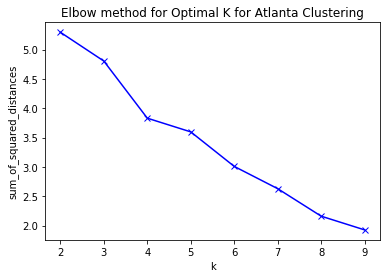

In [28]:
sum_of_squared_distances = []
K=range(2,10)
Atlanta_grouped_clustering = Atlanta_grouped.drop('Neighborhood', 1)
for k in K:
    print(k, end='')
    kmeansATL=KMeans(n_clusters= k).fit(Atlanta_grouped_clustering)
    sum_of_squared_distances.append(kmeansATL.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for Optimal K for Atlanta Clustering')
plt.show()

### Setting K and Clustering Neighborhoods

In [29]:
kclusters = 6

Atlanta_grouped_clustering = Atlanta_grouped.drop('Neighborhood', 1)

kmeans_Atlanta = KMeans(n_clusters=kclusters, random_state=0).fit(Atlanta_grouped_clustering)

kmeans_Atlanta.labels_[1:10]

array([0, 5, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

### Create a new dataframe with cluster labels appended

In [30]:
ATL_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_Atlanta.labels_)

ATL_merged1 = atl_zip

ATL_merged1 = ATL_merged1.join(ATL_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods')

ATL_merged1.head()

,Zipcode,Neighborhoods,Latitude,Longitude,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,30303,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,Atlanta,GA,0.0,Sandwich Place,Theater,Mexican Restaurant,Deli / Bodega,Caribbean Restaurant,Coffee Shop,College Basketball Court,Cuban Restaurant,Poke Place,Pizza Place
1,30305,Buckhead - Garden Hills - Haynes Manor - Peach...,33.830054,-84.38472,Atlanta,GA,0.0,Italian Restaurant,Chinese Restaurant,Salon / Barbershop,Sushi Restaurant,Pharmacy,Tanning Salon,Shipping Store,Farmers Market,Basketball Court,Cosmetics Shop
2,30306,Virginia Highlands - Morningside/Lenox Park - ...,33.786755,-84.35149,Atlanta,GA,0.0,Boutique,Massage Studio,Yoga Studio,Café,Pet Store,Burger Joint,Mexican Restaurant,BBQ Joint,Gift Shop,Thai Restaurant
3,30307,Candler Park - Druid Hills - Edgewood - Emory ...,33.768205,-84.33786,Atlanta,GA,0.0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court,Basketball Court,Park,Outdoor Sculpture,Photography Studio,Pool
4,30308,Midtown - Old Fourth Ward,33.771755,-84.38065,Atlanta,GA,0.0,Southern / Soul Food Restaurant,Hotel,Lounge,Pizza Place,Park,Cuban Restaurant,New American Restaurant,Nail Salon,Coffee Shop,Clothing Store


### Make sure the Cluster labels are Integers

In [31]:
Atlanta_merged_Final = ATL_merged1.dropna()
Atlanta_merged_Final['Cluster Labels'] =Atlanta_merged_Final['Cluster Labels'].astype(int)
Atlanta_merged_Final.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Zipcode,Neighborhoods,Latitude,Longitude,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,30303,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,Atlanta,GA,0,Sandwich Place,Theater,Mexican Restaurant,Deli / Bodega,Caribbean Restaurant,Coffee Shop,College Basketball Court,Cuban Restaurant,Poke Place,Pizza Place
1,30305,Buckhead - Garden Hills - Haynes Manor - Peach...,33.830054,-84.38472,Atlanta,GA,0,Italian Restaurant,Chinese Restaurant,Salon / Barbershop,Sushi Restaurant,Pharmacy,Tanning Salon,Shipping Store,Farmers Market,Basketball Court,Cosmetics Shop
2,30306,Virginia Highlands - Morningside/Lenox Park - ...,33.786755,-84.35149,Atlanta,GA,0,Boutique,Massage Studio,Yoga Studio,Café,Pet Store,Burger Joint,Mexican Restaurant,BBQ Joint,Gift Shop,Thai Restaurant
3,30307,Candler Park - Druid Hills - Edgewood - Emory ...,33.768205,-84.33786,Atlanta,GA,0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court,Basketball Court,Park,Outdoor Sculpture,Photography Studio,Pool
4,30308,Midtown - Old Fourth Ward,33.771755,-84.38065,Atlanta,GA,0,Southern / Soul Food Restaurant,Hotel,Lounge,Pizza Place,Park,Cuban Restaurant,New American Restaurant,Nail Salon,Coffee Shop,Clothing Store


### Map the clustered neighborhoods in Atlanta, GA, USA

In [32]:
map_atlanta_clusters = folium.Map(location=[latitude_ATL, longitude_ATL], zoom_start=11)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Atlanta_merged_Final['Latitude'], Atlanta_merged_Final['Longitude'], Atlanta_merged_Final['Neighborhoods'], Atlanta_merged_Final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow [cluster-1],
        fill=True,
        fill_color=rainbow [cluster-1],
        fill_opacity=0.9).add_to(map_atlanta_clusters)
       
map_atlanta_clusters

### View a list of the Neighborhood clusters for Atlanta and label them by top venues
## Cluster 0 (Red): Restaurants, Businesses, Tourist Attractions, Hotels, Breweries, Music Venues, Bars

In [33]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 0, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhoods,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown - Central Business District - Fairlee...,GA,0,Sandwich Place,Theater,Mexican Restaurant,Deli / Bodega,Caribbean Restaurant,Coffee Shop,College Basketball Court,Cuban Restaurant,Poke Place,Pizza Place
1,Buckhead - Garden Hills - Haynes Manor - Peach...,GA,0,Italian Restaurant,Chinese Restaurant,Salon / Barbershop,Sushi Restaurant,Pharmacy,Tanning Salon,Shipping Store,Farmers Market,Basketball Court,Cosmetics Shop
2,Virginia Highlands - Morningside/Lenox Park - ...,GA,0,Boutique,Massage Studio,Yoga Studio,Café,Pet Store,Burger Joint,Mexican Restaurant,BBQ Joint,Gift Shop,Thai Restaurant
3,Candler Park - Druid Hills - Edgewood - Emory ...,GA,0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court,Basketball Court,Park,Outdoor Sculpture,Photography Studio,Pool
4,Midtown - Old Fourth Ward,GA,0,Southern / Soul Food Restaurant,Hotel,Lounge,Pizza Place,Park,Cuban Restaurant,New American Restaurant,Nail Salon,Coffee Shop,Clothing Store
5,Midtown - Ansley Park - Brookwood Hills - Lori...,GA,0,Music Venue,Art Gallery,Gas Station,Sandwich Place,Jewelry Store,Restaurant,Café,Museum,Shipping Store,Coffee Shop
6,Adair Park - Capitol View - Oakland City - Wes...,GA,0,Brewery,Pop-Up Shop,Trail,Gastropub,Boutique,Beer Store,Market,Paper / Office Supplies Store,Thrift / Vintage Store,Liquor Store
8,Downtown Atlanta - Grant Park,GA,0,Park,American Restaurant,Coffee Shop,Gas Station,Scenic Lookout,Pizza Place,Intersection,Burger Joint,Mexican Restaurant,Moving Target
9,Downtown Atlanta - Castlebury Hill,GA,0,Sandwich Place,Aquarium,Coffee Shop,Hotel,Fast Food Restaurant,American Restaurant,Sports Bar,Museum,Gift Shop,Food Court
10,Vines City - Mozely Park,GA,0,Park,Pool,Tennis Court,Trail,Fish Market,Frozen Yogurt Shop,Fountain,Food Truck,Food Service,Food Court


### Cluster 1 (Purple): Event Venues, Zoo Exhibits, and Fish Market

In [34]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 1, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]



,Neighborhoods,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Home Park - Northwest Atlanta - Collier Hills ...,GA,1,Event Service,Zoo Exhibit,Food,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fountain,Food Truck,Food Service,Food Court


### Cluster 2 (Light Blue): Gyms, Fast Food and Sports Stadiums

In [35]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 2, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]


,Neighborhoods,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Cascade Real Estate,GA,2,Business Service,Gastropub,Gas Station,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fountain,Food Truck,Food Service,Food Court


### Cluster 3 (Teal): Nature/Parks, Zoo and Fast Food

In [36]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 3, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhoods,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,College Park Real Estate,GA,3,Hotel,Sports Bar,Tram Station,Parking,Rental Car Location,Electronics Store,Flower Shop,Frozen Yogurt Shop,Fountain,Food Truck


### Cluster 4 (Lime green): Residential Apartments, Gay Bars, and Smoke shops

In [37]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 4, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhoods,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Grant Park - Peoplestown - Lakewood,GA,4,Discount Store,Southern / Soul Food Restaurant,Gas Station,Fruit & Vegetable Store,Frozen Yogurt Shop,Fountain,Food Truck,Food Service,Food Court,Food


### Cluster 5 (Orange): Discount shops, Playgrounds and Southern/Soul Food Resturants

In [38]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 5, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhoods,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Briarcliff Woods - Oak Grove - Northlake,GA,5,Lake,Food,Zoo Exhibit,Flower Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fountain,Food Truck,Food Service


### Set up the dataframes for Top 5 by Cluster

In [39]:
ATL_merged1.head()

,Zipcode,Neighborhoods,Latitude,Longitude,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,30303,Downtown - Central Business District - Fairlee...,33.752856,-84.39013,Atlanta,GA,0.0,Sandwich Place,Theater,Mexican Restaurant,Deli / Bodega,Caribbean Restaurant,Coffee Shop,College Basketball Court,Cuban Restaurant,Poke Place,Pizza Place
1,30305,Buckhead - Garden Hills - Haynes Manor - Peach...,33.830054,-84.38472,Atlanta,GA,0.0,Italian Restaurant,Chinese Restaurant,Salon / Barbershop,Sushi Restaurant,Pharmacy,Tanning Salon,Shipping Store,Farmers Market,Basketball Court,Cosmetics Shop
2,30306,Virginia Highlands - Morningside/Lenox Park - ...,33.786755,-84.35149,Atlanta,GA,0.0,Boutique,Massage Studio,Yoga Studio,Café,Pet Store,Burger Joint,Mexican Restaurant,BBQ Joint,Gift Shop,Thai Restaurant
3,30307,Candler Park - Druid Hills - Edgewood - Emory ...,33.768205,-84.33786,Atlanta,GA,0.0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court,Basketball Court,Park,Outdoor Sculpture,Photography Studio,Pool
4,30308,Midtown - Old Fourth Ward,33.771755,-84.38065,Atlanta,GA,0.0,Southern / Soul Food Restaurant,Hotel,Lounge,Pizza Place,Park,Cuban Restaurant,New American Restaurant,Nail Salon,Coffee Shop,Clothing Store


In [40]:
ATL_top5=ATL_merged1[['Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue','4th Most Common Venue', '5th Most Common Venue' ]]
ATL_top5.head()

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0.0,Sandwich Place,Theater,Mexican Restaurant,Deli / Bodega,Caribbean Restaurant
1,0.0,Italian Restaurant,Chinese Restaurant,Salon / Barbershop,Sushi Restaurant,Pharmacy
2,0.0,Boutique,Massage Studio,Yoga Studio,Café,Pet Store
3,0.0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court
4,0.0,Southern / Soul Food Restaurant,Hotel,Lounge,Pizza Place,Park


In [41]:
ATL_top5=ATL_top5.dropna()
ATL_top5['Cluster Labels'] =ATL_top5['Cluster Labels'].astype(int)
ATL_top5.head()

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Sandwich Place,Theater,Mexican Restaurant,Deli / Bodega,Caribbean Restaurant
1,0,Italian Restaurant,Chinese Restaurant,Salon / Barbershop,Sushi Restaurant,Pharmacy
2,0,Boutique,Massage Studio,Yoga Studio,Café,Pet Store
3,0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court
4,0,Southern / Soul Food Restaurant,Hotel,Lounge,Pizza Place,Park


In [42]:
Top5_Atlanta=ATL_top5.pivot_table(values=('1st Most Common Venue','2nd Most Common Venue', '3rd Most Common Venue','4th Most Common Venue', '5th Most Common Venue'), columns='Cluster Labels', aggfunc='first')


Top5_Atlanta.rename(columns={0:'ATL Cluster 0',
                          1:'ATL Cluster 1',
                          2:'ATL Cluster 2',3:'ATL Cluster 3',4:'ATL Cluster 4',5:'ATL Cluster 5'}, 
                 inplace=True)
Top5_Atlanta

Cluster Labels,ATL Cluster 0,ATL Cluster 1,ATL Cluster 2,ATL Cluster 3,ATL Cluster 4,ATL Cluster 5
1st Most Common Venue,Sandwich Place,Event Service,Business Service,Hotel,Discount Store,Lake
2nd Most Common Venue,Theater,Zoo Exhibit,Gastropub,Sports Bar,Southern / Soul Food Restaurant,Food
3rd Most Common Venue,Mexican Restaurant,Food,Gas Station,Tram Station,Gas Station,Zoo Exhibit
4th Most Common Venue,Deli / Bodega,Furniture / Home Store,Furniture / Home Store,Parking,Fruit & Vegetable Store,Flower Shop
5th Most Common Venue,Caribbean Restaurant,Fruit & Vegetable Store,Fruit & Vegetable Store,Rental Car Location,Frozen Yogurt Shop,Furniture / Home Store


## Chicago,IL :Data retrieval, Analysis and Mapping
### Set up the Foursquare API code to retrieve venue data on Chicago Neighborhoods and clean the dataset

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_CHI = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_CHI.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_CHI)

In [44]:
Chicago_venues = getNearbyVenues(names=chicago_zip['COMMUNITY_AREA_NAME'],
                                   latitudes=chicago_zip['Latitude '],
                                   longitudes=chicago_zip['Longitude']
                                  )

Rogers Park
West Ridge
Uptown
Lincoln Square
North Center
Lake View
Lincoln Park
Near North Side
Edison Park
Norwood Park
Jefferson Park
Forest Glen
North Park
Albany Park
Portage Park
Irving Park
Dunning
Belmont Cragin
Hermosa
Avondale
Logan Square
Humboldt park
West Town
Austin
West Garfield Park
East Garfield Park
Near West Side
North Lawndale
South Lawndale
Lower West Side
Loop
Near South Side
Armour Square
Douglas
Oakland
Fuller Park
Grand Boulevard
Kenwood
Washington Park
Hyde Park
Woodlawn
South Shore
Chatham
Avalon Park
South Chicago
Burnside
Calumet Heights
Roseland
Pullman
South Deering
East Side
West Pullman
Riverdale
Hegewisch
Garfield Ridge
Archer Heights
Brighton Park
McKinley Park
Bridgeport
New City
West Elsdon
Gage Park
Clearing
West Lawn
Chicago Lawn
West Englewood
Englewood
Greater Grand Crossing
Ashburn
Auburn Gresham
Beverly
Washington Height
Mount Greenwood
Morgan Park
O'Hare


In [45]:
print(Chicago_venues.shape)
Chicago_venues.head()

(1786, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rogers Park,42.009731,-87.66938,Morse Fresh Market,42.008087,-87.667041,Grocery Store
1,Rogers Park,42.009731,-87.66938,The Common Cup,42.007797,-87.667901,Coffee Shop
2,Rogers Park,42.009731,-87.66938,Glenwood Sunday Market,42.008525,-87.666251,Farmers Market
3,Rogers Park,42.009731,-87.66938,Smack Dab,42.009291,-87.666201,Bakery
4,Rogers Park,42.009731,-87.66938,Rogers Park Social,42.007360,-87.666265,Bar


In [46]:
print('There are {} uniques categories of venues.'.format(len(Chicago_venues['Venue Category'].unique())))
(Chicago_venues.groupby('Neighborhood').count())

There are 194 uniques categories of venues.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park,23,23,23,23,23,23
Archer Heights,26,26,26,26,26,26
Ashburn,26,26,26,26,26,26
Auburn Gresham,26,26,26,26,26,26
Austin,26,26,26,26,26,26
Avalon Park,26,26,26,26,26,26
Avondale,54,54,54,54,54,54
Belmont Cragin,11,11,11,11,11,11
Beverly,26,26,26,26,26,26


### Use one-hot encoding to code the venues by category in Chicago Neighborhoods

In [47]:
# one hot encoding
Chicago_onehot = pd.get_dummies(Chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Chicago_onehot['Neighborhood'] = Chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Chicago_onehot.columns[-1]] + list(Chicago_onehot.columns[:-1])
Chicago_onehot = Chicago_onehot[fixed_columns]

Chicago_onehot.head()

,Neighborhood,Adult Boutique,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Café,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Eastern European Restaurant,Empanada Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Flower Shop,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Hill,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Laundromat,Lawyer,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Opera House,Optical Shop,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Rogers Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Rogers Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Rogers Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Rogers Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

### List the mean frequency of venue categories in each Oxford Neighborhood

In [48]:
Chicago_grouped = Chicago_onehot.groupby('Neighborhood').mean().reset_index()
Chicago_grouped

,Neighborhood,Adult Boutique,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Café,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Eastern European Restaurant,Empanada Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Flower Shop,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Hill,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Laundromat,Lawyer,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Opera House,Optical Shop,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,0.00000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.086957,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.043478,0.000000,0.043478,0.043478,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.00000,0.043478,0.00,0.00,0.000000,0.000000,0.043478,0.000000,0.000000,0.00000,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000,0.043478,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000

### Check the shape of the new dataframe

In [49]:
Chicago_grouped.shape

(73, 195)

### View the Top 5 venues in each Chicago Neighborhood

In [50]:
num_top_venues = 5

for hood in Chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Chicago_grouped[Chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                    venue  freq
0          Ice Cream Shop  0.09
1                     Bar  0.09
2      Light Rail Station  0.04
3  Furniture / Home Store  0.04
4              Donut Shop  0.04


----Archer Heights----
                    venue  freq
0           Train Station  0.08
1             Supermarket  0.08
2      Mexican Restaurant  0.08
3             Video Store  0.08
4  Thrift / Vintage Store  0.08


----Ashburn----
                    venue  freq
0           Train Station  0.08
1             Supermarket  0.08
2      Mexican Restaurant  0.08
3             Video Store  0.08
4  Thrift / Vintage Store  0.08


----Auburn Gresham----
                    venue  freq
0           Train Station  0.08
1             Supermarket  0.08
2      Mexican Restaurant  0.08
3             Video Store  0.08
4  Thrift / Vintage Store  0.08


----Austin----
                    venue  freq
0           Train Station  0.08
1             Supermarket  0.08
2      Mexican Restaurant  0.08

### Now make a dataframe with the top 10 venues in each neighborhood

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
CHI_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
CHI_neighborhoods_venues_sorted['Neighborhood'] = Chicago_grouped['Neighborhood']

for ind in np.arange(Chicago_grouped.shape[0]):
    CHI_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chicago_grouped.iloc[ind, :], num_top_venues)

CHI_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Bar,Ice Cream Shop,Sushi Restaurant,Coffee Shop,Bakery,Donut Shop,Filipino Restaurant,Chinese Restaurant,Light Rail Station,Furniture / Home Store
1,Archer Heights,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
2,Ashburn,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
3,Auburn Gresham,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
4,Austin,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery


## Cluster the Chicago Neighborhoods using K-Means
### Using metrics to determine the best value for K

In [52]:
from sklearn.metrics import silhouette_score

sil=[]
K_sil= range(2,10)
Chicago_grouped_clustering = Chicago_grouped.drop('Neighborhood', 1)
for k in K_sil:
    print(k, end='')
    kmeans=KMeans(n_clusters= k).fit(Chicago_grouped_clustering)
    labels= kmeans.labels_
    sil.append(silhouette_score(Chicago_grouped_clustering, labels, metric='euclidean'))

23456789

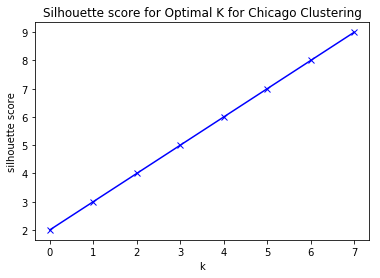

In [53]:
import matplotlib.pyplot as plt
plt.plot(K_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score for Optimal K for Chicago Clustering')
plt.show()

23456789

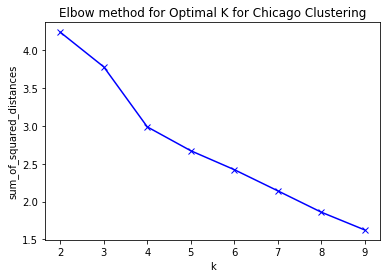

In [54]:
sum_of_squared_distances = []
K=range(2,10)
Chicago_grouped_clustering = Chicago_grouped.drop('Neighborhood', 1)
for k in K:
    print(k, end='')
    kmeans=KMeans(n_clusters= k).fit(Chicago_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for Optimal K for Chicago Clustering')
plt.show()

### Setting K and creating clusters

In [55]:
kclusters = 5

Chicago_grouped_clustering = Chicago_grouped.drop('Neighborhood', 1)

kmeansCHI = KMeans(n_clusters=kclusters, random_state=0).fit(Chicago_grouped_clustering)

kmeansCHI.labels_[1:10] 

array([1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

### Create a new dataframe with the cluster labels appended as a column

In [61]:
CHI_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeansCHI.labels_)

Chicago_merged = chicago_zip

Chicago_merged = Chicago_merged.join(CHI_neighborhoods_venues_sorted.set_index('Neighborhood'), on='COMMUNITY_AREA_NAME')

In [62]:
Chicago_merged.head()

,COMMUNITY_AREA_NAME,Zipcode,Latitude,Longitude,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rogers Park,60626,42.009731,-87.66938,Chicago,IL,0.0,Mexican Restaurant,Pizza Place,American Restaurant,Bakery,Donut Shop,Bar,Theater,Chinese Restaurant,History Museum,Moving Target
1,West Ridge,60645,42.008956,-87.69634,Chicago,IL,0.0,Bar,American Restaurant,Animal Shelter,Park,Dessert Shop,Convenience Store,Mediterranean Restaurant,Currency Exchange,Salon / Barbershop,Asian Restaurant
2,Uptown,60640,41.973181,-87.66650,Chicago,IL,0.0,Gym / Fitness Center,Middle Eastern Restaurant,Adult Boutique,Bike Rental / Bike Share,Bookstore,Sculpture Garden,Sandwich Place,Salon / Barbershop,Breakfast Spot,Bus Station
3,Lincoln Square,60625,41.971614,-87.70256,Chicago,IL,0.0,Mexican Restaurant,Bus Station,Park,Bank,Gym,Track,Soccer Field,Ice Cream Shop,Taco Place,Filipino Restaurant
4,North Center,60618,41.945681,-87.70480,Chicago,IL,0.0,Bus Station,Currency Exchange,Bank,Chinese Restaurant,Park,Theater,Mexican Restaurant,Sandwich Place,Salon / Barbershop,Restaurant


### Make sure the Cluster Labels are integers and not floats as they will not map properly otherwise


In [63]:
Chicago_merged_Final = Chicago_merged.dropna()
Chicago_merged_Final['Cluster Labels'] =Chicago_merged_Final['Cluster Labels'].astype(int)
Chicago_merged_Final.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,COMMUNITY_AREA_NAME,Zipcode,Latitude,Longitude,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rogers Park,60626,42.009731,-87.66938,Chicago,IL,0,Mexican Restaurant,Pizza Place,American Restaurant,Bakery,Donut Shop,Bar,Theater,Chinese Restaurant,History Museum,Moving Target
1,West Ridge,60645,42.008956,-87.69634,Chicago,IL,0,Bar,American Restaurant,Animal Shelter,Park,Dessert Shop,Convenience Store,Mediterranean Restaurant,Currency Exchange,Salon / Barbershop,Asian Restaurant
2,Uptown,60640,41.973181,-87.66650,Chicago,IL,0,Gym / Fitness Center,Middle Eastern Restaurant,Adult Boutique,Bike Rental / Bike Share,Bookstore,Sculpture Garden,Sandwich Place,Salon / Barbershop,Breakfast Spot,Bus Station
3,Lincoln Square,60625,41.971614,-87.70256,Chicago,IL,0,Mexican Restaurant,Bus Station,Park,Bank,Gym,Track,Soccer Field,Ice Cream Shop,Taco Place,Filipino Restaurant
4,North Center,60618,41.945681,-87.70480,Chicago,IL,0,Bus Station,Currency Exchange,Bank,Chinese Restaurant,Park,Theater,Mexican Restaurant,Sandwich Place,Salon / Barbershop,Restaurant


### Map the clustered Neighborhoods in Chicago IL

In [64]:
map_Chicago_clusters = folium.Map(location=[latitude_CHI, longitude_CHI], zoom_start=13)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Chicago_merged_Final['Latitude '], Chicago_merged_Final['Longitude'], Chicago_merged_Final['COMMUNITY_AREA_NAME'], Chicago_merged_Final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=0.9).add_to(map_Chicago_clusters)
       
map_Chicago_clusters

## View a list of each cluster to determine the top venues in each and label them
### Cluster 0 (Red): Restaurant, Bar, GYMs, Bus station

In [65]:
Chicago_merged_Final.loc[Chicago_merged_Final['Cluster Labels'] == 0, Chicago_merged_Final.columns[[1] + list(range(5, Chicago_merged_Final.shape[1]))]]

,Zipcode,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60626,IL,0,Mexican Restaurant,Pizza Place,American Restaurant,Bakery,Donut Shop,Bar,Theater,Chinese Restaurant,History Museum,Moving Target
1,60645,IL,0,Bar,American Restaurant,Animal Shelter,Park,Dessert Shop,Convenience Store,Mediterranean Restaurant,Currency Exchange,Salon / Barbershop,Asian Restaurant
2,60640,IL,0,Gym / Fitness Center,Middle Eastern Restaurant,Adult Boutique,Bike Rental / Bike Share,Bookstore,Sculpture Garden,Sandwich Place,Salon / Barbershop,Breakfast Spot,Bus Station
3,60625,IL,0,Mexican Restaurant,Bus Station,Park,Bank,Gym,Track,Soccer Field,Ice Cream Shop,Taco Place,Filipino Restaurant
4,60618,IL,0,Bus Station,Currency Exchange,Bank,Chinese Restaurant,Park,Theater,Mexican Restaurant,Sandwich Place,Salon / Barbershop,Restaurant
5,60657,IL,0,Sports Bar,Bakery,Sandwich Place,Performing Arts Venue,Music Venue,Bagel Shop,Pizza Place,Soccer Field,Café,Bar
6,60614,IL,0,Yoga Studio,Bakery,Gym,Japanese Restaurant,Grocery Store,Greek Restaurant,Furniture / Home Store,Mexican Restaurant,Donut Shop,Pizza Place
7,60611,IL,0,Italian Restaurant,Coffee Shop,Boutique,American Restaurant,Café,Hotel,Steakhouse,Bar,Shoe Store,Men's Store
8,60631,IL,0,Donut Shop,Coffee Shop,Park,Gym / Fitness Center,Bank,Eastern European Restaurant,Flower Shop,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant
9,60646,IL,0,Sandwich Place,Salon / Barbershop,Insurance Office,Bus Station,Restaurant,Spa,Golf Course,Diner,Plaza,Grocery Store


### Cluster 1 (Purple): Diner, Video store, Train station, Super Market

In [66]:
Chicago_merged_Final.loc[Chicago_merged_Final['Cluster Labels'] == 1, Chicago_merged_Final.columns[[1] + list(range(5, Chicago_merged_Final.shape[1]))]]

,Zipcode,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,60612,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
23,60644,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
30,60616,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
36,60615,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
37,60615,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
38,60637,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
39,60615,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
40,60637,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
42,60619,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery
43,60619,IL,1,Diner,Video Store,Thrift / Vintage Store,Mexican Restaurant,Train Station,Supermarket,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Bakery


### Cluster 2 (Light Blue): Small Shops and Food

In [67]:
Chicago_merged_Final.loc[Chicago_merged_Final['Cluster Labels'] == 2, Chicago_merged_Final.columns[[1] + list(range(5, Chicago_merged_Final.shape[1]))]]

,Zipcode,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,60624,IL,2,Shoe Store,Fast Food Restaurant,Sandwich Place,Cosmetics Shop,Park,Fried Chicken Joint,Sporting Goods Shop,Caribbean Restaurant,Supermarket,Yoga Studio
24,60624,IL,2,Shoe Store,Fast Food Restaurant,Sandwich Place,Cosmetics Shop,Park,Fried Chicken Joint,Sporting Goods Shop,Caribbean Restaurant,Supermarket,Yoga Studio
25,60624,IL,2,Shoe Store,Fast Food Restaurant,Sandwich Place,Cosmetics Shop,Park,Fried Chicken Joint,Sporting Goods Shop,Caribbean Restaurant,Supermarket,Yoga Studio


### Cluster 3 (Light Green): Cafes and Parks


In [68]:
Chicago_merged_Final.loc[Chicago_merged_Final['Cluster Labels'] == 3, Chicago_merged_Final.columns[[1] + list(range(5, Chicago_merged_Final.shape[1]))]]


,Zipcode,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,60617,IL,3,Wine Bar,Mexican Restaurant,Park,Yoga Studio,Eastern European Restaurant,Flower Shop,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant
46,60617,IL,3,Wine Bar,Mexican Restaurant,Park,Yoga Studio,Eastern European Restaurant,Flower Shop,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant
50,60617,IL,3,Wine Bar,Mexican Restaurant,Park,Yoga Studio,Eastern European Restaurant,Flower Shop,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant


### Cluster 4 (Orange): Pubs, Shopping Mall, Restaurants, Museums and Bars

In [69]:
Chicago_merged_Final.loc[Chicago_merged_Final['Cluster Labels'] == 4, Chicago_merged_Final.columns[[1] + list(range(5, Chicago_merged_Final.shape[1]))]]

,Zipcode,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,60827,IL,4,Pizza Place,Home Service,Lounge,Dry Cleaner,Flower Shop,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant,Farmers Market


## Top Venues by Neighborhood Cluster Chicago, IL versus Atlanta, USA

In [70]:
Chicago_merged_Final.head()

,COMMUNITY_AREA_NAME,Zipcode,Latitude,Longitude,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rogers Park,60626,42.009731,-87.66938,Chicago,IL,0,Mexican Restaurant,Pizza Place,American Restaurant,Bakery,Donut Shop,Bar,Theater,Chinese Restaurant,History Museum,Moving Target
1,West Ridge,60645,42.008956,-87.69634,Chicago,IL,0,Bar,American Restaurant,Animal Shelter,Park,Dessert Shop,Convenience Store,Mediterranean Restaurant,Currency Exchange,Salon / Barbershop,Asian Restaurant
2,Uptown,60640,41.973181,-87.66650,Chicago,IL,0,Gym / Fitness Center,Middle Eastern Restaurant,Adult Boutique,Bike Rental / Bike Share,Bookstore,Sculpture Garden,Sandwich Place,Salon / Barbershop,Breakfast Spot,Bus Station
3,Lincoln Square,60625,41.971614,-87.70256,Chicago,IL,0,Mexican Restaurant,Bus Station,Park,Bank,Gym,Track,Soccer Field,Ice Cream Shop,Taco Place,Filipino Restaurant
4,North Center,60618,41.945681,-87.70480,Chicago,IL,0,Bus Station,Currency Exchange,Bank,Chinese Restaurant,Park,Theater,Mexican Restaurant,Sandwich Place,Salon / Barbershop,Restaurant


In [71]:
CHI_top5=Chicago_merged_Final[['Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue','4th Most Common Venue', '5th Most Common Venue' ]]
CHI_top5.head()

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Mexican Restaurant,Pizza Place,American Restaurant,Bakery,Donut Shop
1,0,Bar,American Restaurant,Animal Shelter,Park,Dessert Shop
2,0,Gym / Fitness Center,Middle Eastern Restaurant,Adult Boutique,Bike Rental / Bike Share,Bookstore
3,0,Mexican Restaurant,Bus Station,Park,Bank,Gym
4,0,Bus Station,Currency Exchange,Bank,Chinese Restaurant,Park


In [72]:
Top5_Chicago=CHI_top5.pivot_table(values=('1st Most Common Venue','2nd Most Common Venue', '3rd Most Common Venue','4th Most Common Venue', '5th Most Common Venue'), columns='Cluster Labels', aggfunc='first')


Top5_Chicago.rename(columns={0:'CHI Cluster 0',
                          1:'CHI Cluster 1',
                          2:'CHI Cluster 2',3:'CHI Cluster 3',4:'CHI Cluster 4'}, 
                 inplace=True)
Top5_Chicago

Cluster Labels,CHI Cluster 0,CHI Cluster 1,CHI Cluster 2,CHI Cluster 3,CHI Cluster 4
1st Most Common Venue,Mexican Restaurant,Diner,Shoe Store,Wine Bar,Pizza Place
2nd Most Common Venue,Pizza Place,Video Store,Fast Food Restaurant,Mexican Restaurant,Home Service
3rd Most Common Venue,American Restaurant,Thrift / Vintage Store,Sandwich Place,Park,Lounge
4th Most Common Venue,Bakery,Mexican Restaurant,Cosmetics Shop,Yoga Studio,Dry Cleaner
5th Most Common Venue,Donut Shop,Train Station,Park,Eastern European Restaurant,Flower Shop


## Top 5 venues by Neighborhood Clusters in Chicago versus Atlanta

In [73]:
horizontal_stack_final = pd.concat([Top5_Chicago, Top5_Atlanta], axis=1)
horizontal_stack_final

Cluster Labels,CHI Cluster 0,CHI Cluster 1,CHI Cluster 2,CHI Cluster 3,CHI Cluster 4,ATL Cluster 0,ATL Cluster 1,ATL Cluster 2,ATL Cluster 3,ATL Cluster 4,ATL Cluster 5
1st Most Common Venue,Mexican Restaurant,Diner,Shoe Store,Wine Bar,Pizza Place,Sandwich Place,Event Service,Business Service,Hotel,Discount Store,Lake
2nd Most Common Venue,Pizza Place,Video Store,Fast Food Restaurant,Mexican Restaurant,Home Service,Theater,Zoo Exhibit,Gastropub,Sports Bar,Southern / Soul Food Restaurant,Food
3rd Most Common Venue,American Restaurant,Thrift / Vintage Store,Sandwich Place,Park,Lounge,Mexican Restaurant,Food,Gas Station,Tram Station,Gas Station,Zoo Exhibit
4th Most Common Venue,Bakery,Mexican Restaurant,Cosmetics Shop,Yoga Studio,Dry Cleaner,Deli / Bodega,Furniture / Home Store,Furniture / Home Store,Parking,Fruit & Vegetable Store,Flower Shop
5th Most Common Venue,Donut Shop,Train Station,Park,Eastern European Restaurant,Flower Shop,Caribbean Restaurant,Fruit & Vegetable Store,Fruit & Vegetable Store,Rental Car Location,Frozen Yogurt Shop,Furniture / Home Store
